In [1]:
%load_ext autoreload
%autoreload
import tools as tools
import core as core

In [2]:
# Open dataset and filter for europe
ds = tools.open_dataset(months=range(1,3+1))
ds_eu = tools.filter_europe_box(ds)

In [10]:
# Choose one single box to print pot through time
ds_vienna = ds.sel(latitude=slice(48, 48)).sel(longitude=slice(16.25, 16.25))
ds_vienna

<xarray.Dataset> Size: 105kB
Dimensions:     (valid_time: 2184, latitude: 1, longitude: 1)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 17kB 2000-01-01 ... 2000-03-31T23...
  * latitude    (latitude) float64 8B 48.0
  * longitude   (longitude) float64 8B 16.25
    expver      (valid_time) <U4 35kB dask.array<chunksize=(744,), meta=np.ndarray>
Data variables:
    t2m         (valid_time, latitude, longitude) float32 9kB dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    ssrd        (valid_time, latitude, longitude) float32 9kB dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    ssrdc       (valid_time, latitude, longitude) float32 9kB dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    u10         (valid_time, latitude, longitude) float32 9kB dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 9kB dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    wspd        (valid_time, latitude, longitude) float32 9kB dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-21T19:50 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
# Main pvpot calculation and grouping
pvpot_pre = core.pv_pot(ds_vienna)

In [13]:
# Do the proper computation
pvpot = tools.dask_compute(pvpot_pre)

<Client: 'tcp://127.0.0.1:39235' processes=20 threads=80, memory=753.83 GiB>
Execution time: 6.66050 seconds


In [14]:
tools.print_pvpot_stats(pvpot)

Calculated pvpot:
    Shape: (2184, 1, 1)
    Months: 2184
    Min: 0.0
    Mean: 0.09374259412288666
    Max: 0.6487878561019897
    Std: 0.14766119420528412
    


In [24]:
pvpot

<xarray.DataArray (valid_time: 2184, latitude: 1, longitude: 1)> Size: 9kB
array([[[0.]],

       [[0.]],

       [[0.]],

       ...,

       [[0.]],

       [[0.]],

       [[0.]]], dtype=float32)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 17kB 2000-01-01 ... 2000-03-31T23...
  * latitude    (latitude) float64 8B 48.0
  * longitude   (longitude) float64 8B 16.25
    expver      (valid_time) <U4 35kB '0001' '0001' '0001' ... '0001' '0001'

In [31]:
pvpot.values

array([[[0.]],

       [[0.]],

       [[0.]],

       ...,

       [[0.]],

       [[0.]],

       [[0.]]], dtype=float32)

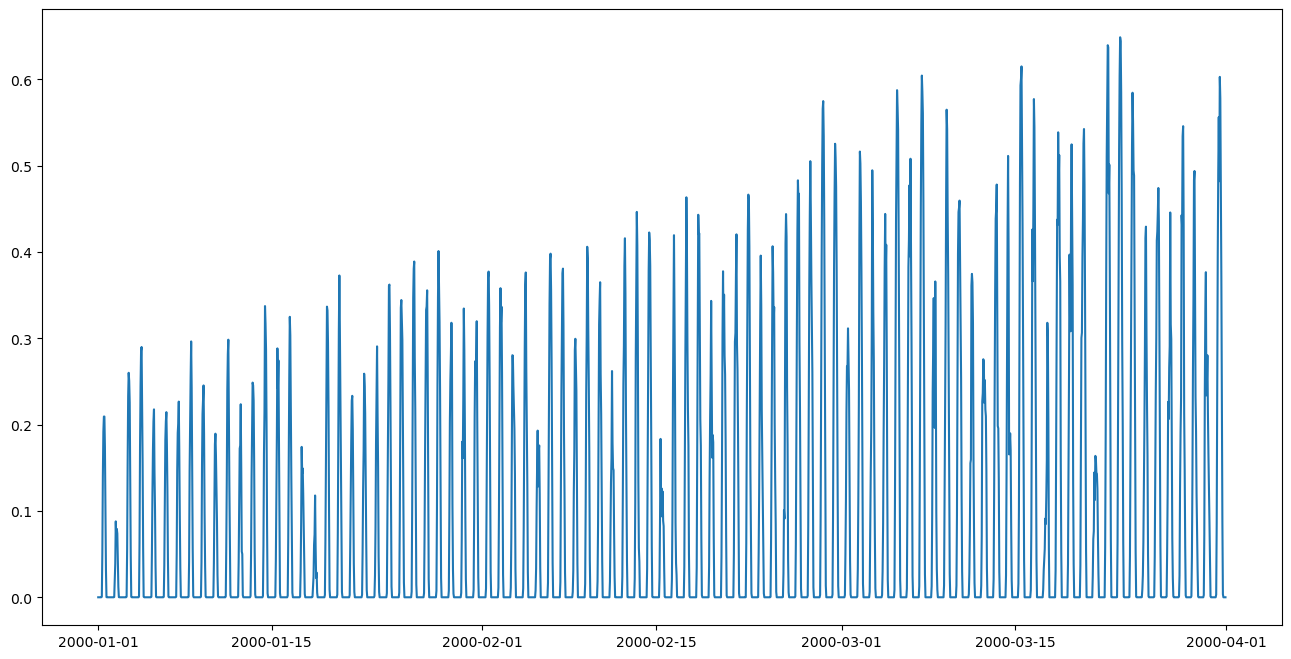

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(pvpot['valid_time'], pvpot.values.squeeze())

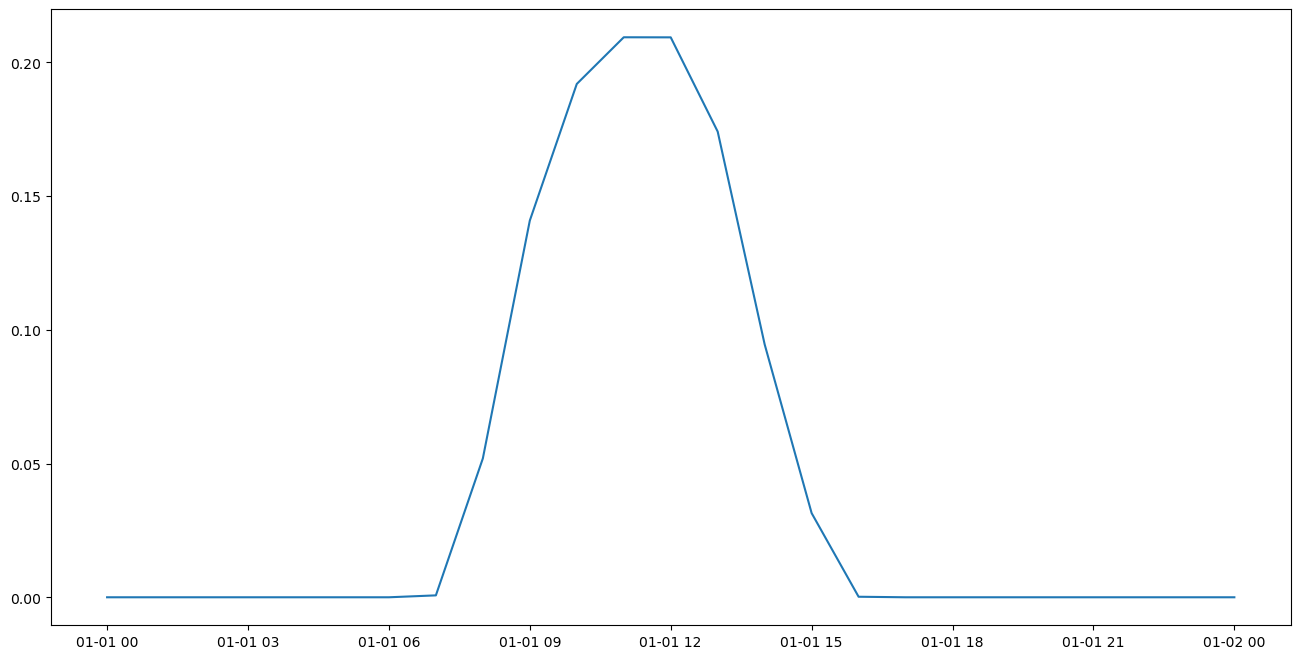

In [39]:
pvpot_1_feb= pvpot.sel(valid_time=slice("2000-01-01T00","2000-01-02T00"))
plt.figure(figsize=(16, 8))
plt.plot(pvpot_1_feb['valid_time'], pvpot_1_feb.values.squeeze())